# Descarga y procesado de datos desde la APi del CDS

## Install all the dependencies

In [ ]:
#!pip install -U cdsapi
#!pip install xarray cfgrib netCDF4
#!pip install h5py
#!pip install rioxarray

## Descarga de datos horarios

In [20]:
import cdsapi

# 📂 Configuración del dataset y parámetros de descarga
dataset = "reanalysis-era5-land"
request = {
    "variable": ["2m_temperature"],  # Temperatura a 2 metros
    "year": "2022",  # Año a descargar
    "month": [f"{m:02d}" for m in range(1, 13)],  # Todos los meses
    "day": [f"{d:02d}" for d in range(1, 32)],  # Todos los días del mes
    "time": [f"{h:02d}:00" for h in range(24)],  # Todas las horas del día
    "data_format": "grib",  # Formato de salida
    "download_format": "unarchived",  # Sin comprimir
    "area": [55, 5.5, 47, 15.5],  # 📌 BBox de Alemania [Norte, Oeste, Sur, Este]
}

# 🔥 Inicializar cliente de Copernicus y descargar datos
client = cdsapi.Client()
client.retrieve(dataset, request).download("temperatura_2m_2022_alemania.grib")

print("✅ Descarga completada: temperatura_2m_2022_alemania.grib")

2025-03-01 18:01:22,669 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-03-01 18:01:22,670 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.
2025-03-01 18:01:22,858 INFO Request ID is 3f740ebe-8c93-4e4d-beb1-3aca37ca257f
2025-03-01 18:01:22,921 INFO status has been updated to accepted
2025-03-01 18:01:27,869 INFO status has been updated to running
2025-03-01 18:21:42,673 INFO status has been updated to successful
                                                                                                                                            

✅ Descarga completada: temperatura_2m_2022_alemania.grib


## Análisis de los datos

In [2]:
import xarray as xr

file_path = "/home/diego/temperatura_2m_2021_alemania.grib"

# Cargar el archivo con el motor netCDF4
ds = xr.open_dataset(file_path, engine='cfgrib', decode_timedelta=True)

# Ver la estructura del dataset
print(ds)

<xarray.Dataset> Size: 288MB
Dimensions:     (time: 366, step: 24, latitude: 81, longitude: 101)
Coordinates:
    number      int64 8B ...
  * time        (time) datetime64[ns] 3kB 2020-12-31 2021-01-01 ... 2021-12-31
  * step        (step) timedelta64[ns] 192B 01:00:00 ... 1 days 00:00:00
    surface     float64 8B ...
  * latitude    (latitude) float64 648B 55.0 54.9 54.8 54.7 ... 47.2 47.1 47.0
  * longitude   (longitude) float64 808B 5.5 5.6 5.7 5.8 ... 15.2 15.3 15.4 15.5
    valid_time  (time, step) datetime64[ns] 70kB ...
Data variables:
    t2m         (time, step, latitude, longitude) float32 287MB ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-03-01T17:52 GRIB to CDM+CF via cfgrib-0.9.1

In [3]:
temperatura = ds['t2m']
print(temperatura)

<xarray.DataArray 't2m' (time: 366, step: 24, latitude: 81, longitude: 101)> Size: 287MB
[71861904 values with dtype=float32]
Coordinates:
    number      int64 8B ...
  * time        (time) datetime64[ns] 3kB 2020-12-31 2021-01-01 ... 2021-12-31
  * step        (step) timedelta64[ns] 192B 01:00:00 ... 1 days 00:00:00
    surface     float64 8B ...
  * latitude    (latitude) float64 648B 55.0 54.9 54.8 54.7 ... 47.2 47.1 47.0
  * longitude   (longitude) float64 808B 5.5 5.6 5.7 5.8 ... 15.2 15.3 15.4 15.5
    valid_time  (time, step) datetime64[ns] 70kB ...
Attributes: (12/31)
    GRIB_paramId:                             167
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      8181
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_shortName:                           2t
    GRIB_to

In [4]:
# Convertir la temperatura de Kelvin a Celsius
temperatura_celsius = ds['t2m'] - 273.15

<xarray.DataArray 't2m' (time: 366, latitude: 81, longitude: 101)> Size: 12MB
array([[[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        ...,
        [  2.601471  ,   2.4881897 ,   2.210846  , ..., -11.378998  ,
          -8.61142   ,  -7.6543884 ],
        [  2.5956116 ,   2.4960022 ,   2.322174  , ...,  -8.541107  ,
          -6.0469666 ,  -5.7637634 ],
        [  2.3553772 ,   2.3143616 ,   2.1717834 , ...,  -6.380951  ,
          -5.148529  ,  -5.3243103 ]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,       

(array([4.0000e+00, 4.0000e+00, 1.7000e+01, 2.1000e+01, 2.6000e+01,
        5.7000e+01, 8.0000e+01, 1.0600e+02, 1.6100e+02, 2.1700e+02,
        2.5600e+02, 2.7300e+02, 3.2900e+02, 4.4700e+02, 6.1800e+02,
        7.8800e+02, 1.1480e+03, 1.4470e+03, 1.9850e+03, 2.3680e+03,
        2.7490e+03, 3.3580e+03, 4.2800e+03, 4.2030e+03, 4.4250e+03,
        4.7630e+03, 5.5050e+03, 5.9610e+03, 6.1430e+03, 6.7640e+03,
        7.7380e+03, 8.7490e+03, 9.0030e+03, 9.4860e+03, 1.0022e+04,
        1.2242e+04, 1.6029e+04, 1.9630e+04, 2.3531e+04, 2.8955e+04,
        3.5323e+04, 4.4001e+04, 5.6046e+04, 6.0700e+04, 6.0505e+04,
        5.6091e+04, 5.4842e+04, 5.4580e+04, 5.4056e+04, 5.5544e+04,
        5.9247e+04, 6.0539e+04, 6.2017e+04, 6.5678e+04, 6.6299e+04,
        7.0535e+04, 6.8177e+04, 6.3619e+04, 5.7524e+04, 5.3943e+04,
        4.9425e+04, 4.7037e+04, 5.0311e+04, 5.4189e+04, 5.3156e+04,
        5.3373e+04, 4.6886e+04, 3.9464e+04, 3.7290e+04, 3.4936e+04,
        3.7423e+04, 4.2303e+04, 5.0182e+04, 5.65

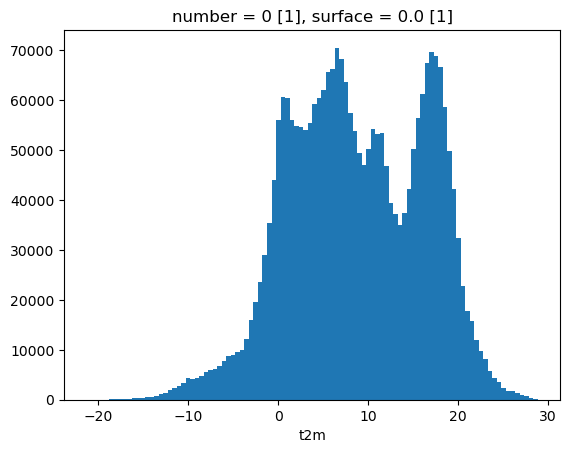

In [5]:
temperatura_media_diaria = temperatura_celsius.mean(dim='step')
print(temperatura_media_diaria)
temperatura_media_diaria.plot(bins=100)

<xarray.DataArray 't2m' (step: 24, latitude: 81, longitude: 101)> Size: 785kB
array([[[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        ...,
        [ 2.29190063e+00,  2.23135376e+00,  1.96377563e+00, ...,
         -1.05245056e+01, -7.95223999e+00, -7.08309937e+00],
        [ 2.33877563e+00,  2.28213501e+00,  2.11026001e+00, ...,
         -8.38583374e+00, -5.97372437e+00, -5.42489624e+00],
        [ 2.10830688e+00,  2.09658813e+00,  1.95401001e+00, ...,
         -6.60067749e+00, -5.25888062e+00, -5.10067749e+00]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,

(array([4.000e+00, 7.000e+00, 1.400e+01, 9.000e+00, 1.900e+01, 2.600e+01,
        3.800e+01, 5.000e+01, 5.800e+01, 5.900e+01, 7.800e+01, 9.400e+01,
        9.900e+01, 1.250e+02, 1.180e+02, 1.370e+02, 1.360e+02, 1.570e+02,
        1.780e+02, 1.640e+02, 1.440e+02, 1.540e+02, 1.930e+02, 1.760e+02,
        1.870e+02, 2.200e+02, 2.320e+02, 2.280e+02, 2.060e+02, 2.400e+02,
        2.240e+02, 2.290e+02, 2.150e+02, 2.050e+02, 2.160e+02, 1.940e+02,
        2.310e+02, 2.330e+02, 2.730e+02, 2.460e+02, 2.420e+02, 2.600e+02,
        2.200e+02, 2.060e+02, 2.300e+02, 2.610e+02, 2.650e+02, 2.700e+02,
        2.760e+02, 3.110e+02, 3.260e+02, 3.440e+02, 4.040e+02, 4.370e+02,
        5.420e+02, 7.900e+02, 1.087e+03, 1.313e+03, 1.580e+03, 1.806e+03,
        2.080e+03, 2.391e+03, 2.692e+03, 2.989e+03, 3.576e+03, 3.920e+03,
        4.439e+03, 4.943e+03, 5.366e+03, 5.888e+03, 6.249e+03, 6.921e+03,
        7.287e+03, 7.890e+03, 7.772e+03, 7.339e+03, 7.239e+03, 7.095e+03,
        6.974e+03, 6.931e+03, 6.912e+0

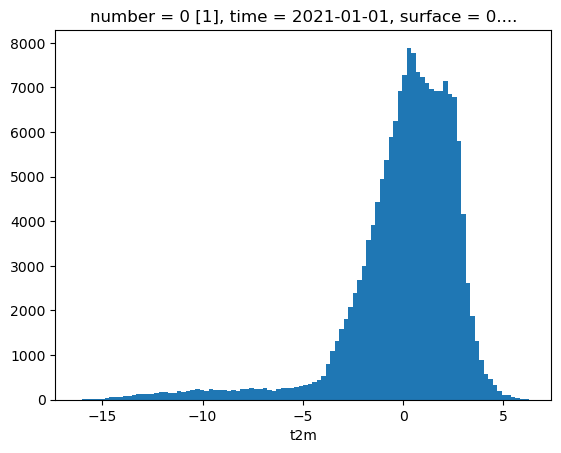

In [7]:
# Seleccionar el 1 de enero de 2024
temperatura_1_enero = temperatura_celsius.sel(time='2021-01-01')
print(temperatura_1_enero)
temperatura_1_enero.plot(bins=100)

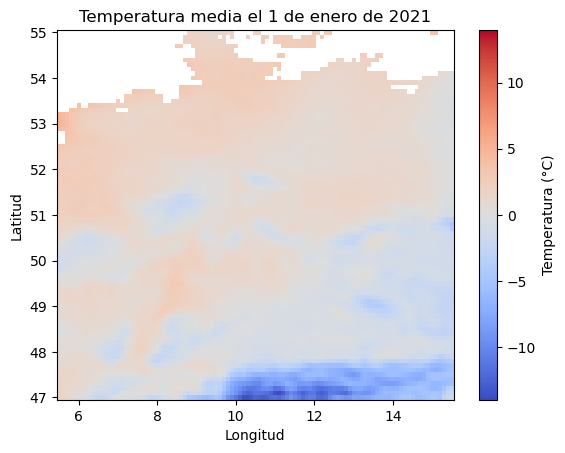

In [9]:
import matplotlib.pyplot as plt

# Graficar la temperatura media diaria para el 1 de enero de 2024
temperatura_1_enero_media = temperatura_1_enero.mean(dim='step')

# Crear la figura y el eje
fig, ax = plt.subplots()

# Graficar los datos usando `imshow` o `pcolormesh` (genera un objeto mappable)
mappable = temperatura_1_enero_media.plot(ax=ax, cmap='coolwarm', add_colorbar=False)

# Añadir la barra de color
plt.colorbar(mappable, ax=ax, label='Temperatura (°C)')

# Añadir título y etiquetas
ax.set_title('Temperatura media el 1 de enero de 2021')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Mostrar la gráfica
plt.show()

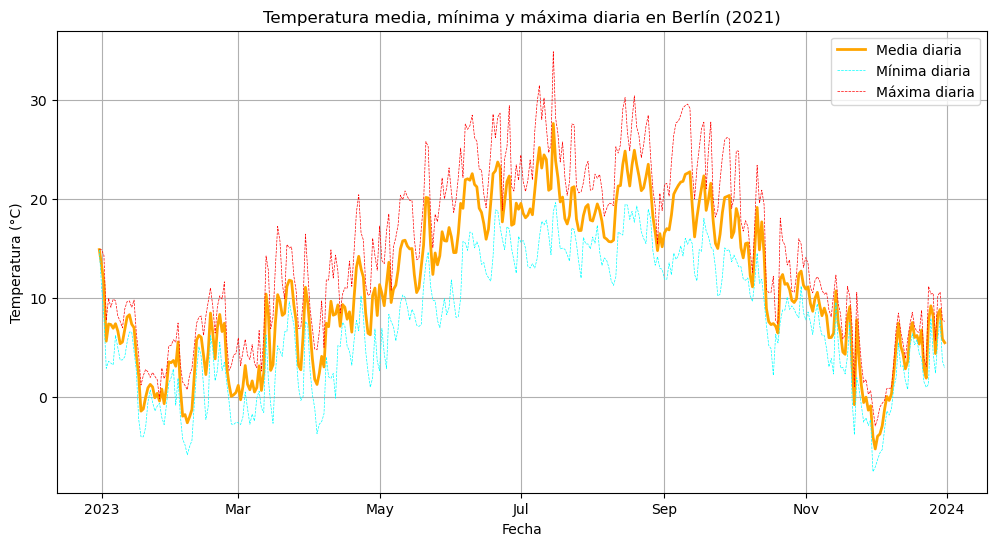

In [19]:
import xarray as xr
import matplotlib.pyplot as plt

# Cargar el archivo GRIB con decode_timedelta explícito
file_path = "temperatura_2m_2023_alemania.grib"
ds = xr.open_dataset(file_path, engine='cfgrib', decode_timedelta=False)

# Convertir la temperatura de Kelvin a Celsius
temperatura_celsius = ds['t2m'] - 273.15

# Seleccionar una coordenada específica (por ejemplo, Berlín: latitud ~52.52, longitud ~13.41)
latitud = 52.52
longitud = 13.41

# Extraer los datos para la coordenada específica
temperatura_punto = temperatura_celsius.sel(
    latitude=latitud, longitude=longitud, method='nearest'
)

# Calcular la media, mínima y máxima diaria
temperatura_media_diaria = temperatura_punto.mean(dim='step')
temperatura_minima_diaria = temperatura_punto.min(dim='step')
temperatura_maxima_diaria = temperatura_punto.max(dim='step')

# Graficar las series temporales
plt.figure(figsize=(12, 6))

# Graficar la media diaria (rojo para calor)
temperatura_media_diaria.plot(label='Media diaria', color='orange', linewidth=2)

# Graficar la mínima diaria (azul para frío)
temperatura_minima_diaria.plot(label='Mínima diaria', color='cyan', linestyle='--', linewidth=0.5)

# Graficar la máxima diaria (naranja para calor extremo)
temperatura_maxima_diaria.plot(label='Máxima diaria', color='red', linestyle='--', linewidth=0.5)

# Añadir título y etiquetas
plt.title(f'Temperatura media, mínima y máxima diaria en Berlín (2021)')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.legend()  # Mostrar leyenda
plt.grid(True)  # Añadir una cuadrícula

# Mostrar la gráfica
plt.show()

# Estadísiticas zonales

In [2]:
import geopandas as gpd

# Cargar el archivo GeoJSON
ciudades = gpd.read_file('/media/diego/Datos4/EBD/varios/VH/Fwd_ Shape files German major cities/15GermanCities_4326.shp')

# Ver las primeras filas
print(ciudades.head())

  NUTS_ID  LEVL_CODE CNTR_CODE                   NAME_LATN  \
0   DE212          3        DE   München, Kreisfreie Stadt   
1   DE111          3        DE       Stuttgart, Stadtkreis   
2   DE254          3        DE  Nürnberg, Kreisfreie Stadt   
3   DE501          3        DE    Bremen, Kreisfreie Stadt   
4   DE600          3        DE                     Hamburg   

                    NUTS_NAME MOUNT_TYPE URBN_TYPE COAST_TYPE  \
0   München, Kreisfreie Stadt       None      None       None   
1       Stuttgart, Stadtkreis       None      None       None   
2  Nürnberg, Kreisfreie Stadt       None      None       None   
3    Bremen, Kreisfreie Stadt       None      None       None   
4                     Hamburg       None      None       None   

                                            geometry  
0  POLYGON ((11.49982 48.24815, 11.53857 48.23103...  
1  POLYGON ((9.10472 48.70908, 9.04382 48.74275, ...  
2  MULTIPOLYGON (((11.24676 49.43780, 11.26607 49...  
3  MULTIPOLYGON 

In [4]:
from rasterstats import zonal_stats

# Calcular estadísticas zonal
stats = zonal_stats(
    ciudades,  # Polígonos de las ciudades
    '/media/diego/Datos4/EBD/varios/VH/gribs/temperatura_2m_2021_alemania.grib',  # Raster de temperatura K
    stats=['mean', 'min', 'max'],  # Estadísticas a calcular
    geojson_out=True  # Devolver los resultados en formato GeoJSON
)

# Convertir los resultados a un GeoDataFrame
resultados = gpd.GeoDataFrame.from_features(stats)

# Ver los resultados
print(resultados)

                                             geometry CNTR_CODE COAST_TYPE  \
0   POLYGON ((11.49982 48.24815, 11.53857 48.23103...        DE       None   
1   POLYGON ((9.10472 48.70908, 9.04382 48.74275, ...        DE       None   
2   MULTIPOLYGON (((11.24676 49.43780, 11.26607 49...        DE       None   
3   MULTIPOLYGON (((8.91583 53.01102, 8.87103 53.0...        DE       None   
4   MULTIPOLYGON (((10.23668 53.49635, 10.24864 53...        DE       None   
5   POLYGON ((8.59024 50.15954, 8.59239 50.16859, ...        DE       None   
6   POLYGON ((13.66698 52.47417, 13.75069 52.44504...        DE       None   
7   POLYGON ((7.50845 51.41794, 7.46533 51.41607, ...        DE       None   
8   POLYGON ((10.03447 52.28377, 9.97223 52.29089,...        DE       None   
9   POLYGON ((6.85605 51.12619, 6.85025 51.15968, ...        DE       None   
10  POLYGON ((6.71486 51.33320, 6.70617 51.33669, ...        DE       None   
11  POLYGON ((7.10420 51.48127, 7.11368 51.47059, ...        DE 

# Combinar varios archivos

In [21]:
import xarray as xr

# Ruta a los archivos GRIB
ruta_archivos = "/media/diego/Datos4/EBD/varios/VH/gribs/temperatura_2m_*_alemania.grib"


# Lista de archivos anuales
files = [ "/media/diego/Datos4/EBD/varios/VH/gribs/temperatura_2m_2021_alemania.grib",
        "/media/diego/Datos4/EBD/varios/VH/gribs/temperatura_2m_2022_alemania.grib",
         "/media/diego/Datos4/EBD/varios/VH/gribs/temperatura_2m_2023_alemania.grib", 
         "/media/diego/Datos4/EBD/varios/VH/gribs/temperatura_2m_2024_alemania.grib"]

# Abrir cada archivo y almacenarlo en una lista
datasets = [xr.open_dataset(file) for file in files]

# Combinar los archivos a lo largo de la dimensión 'time'
ds_combined = xr.concat(datasets, dim='time')

# Guardar el archivo combinado
ds_combined.to_netcdf("/media/diego/Datos4/EBD/varios/VH/gribs/temperatura_2m_alemania_combinado.nc")

/home/diego/anaconda3/envs/Pv2/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
/home/diego/anaconda3/envs/Pv2/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
/home/diego/anaconda3/envs/Pv2/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, a

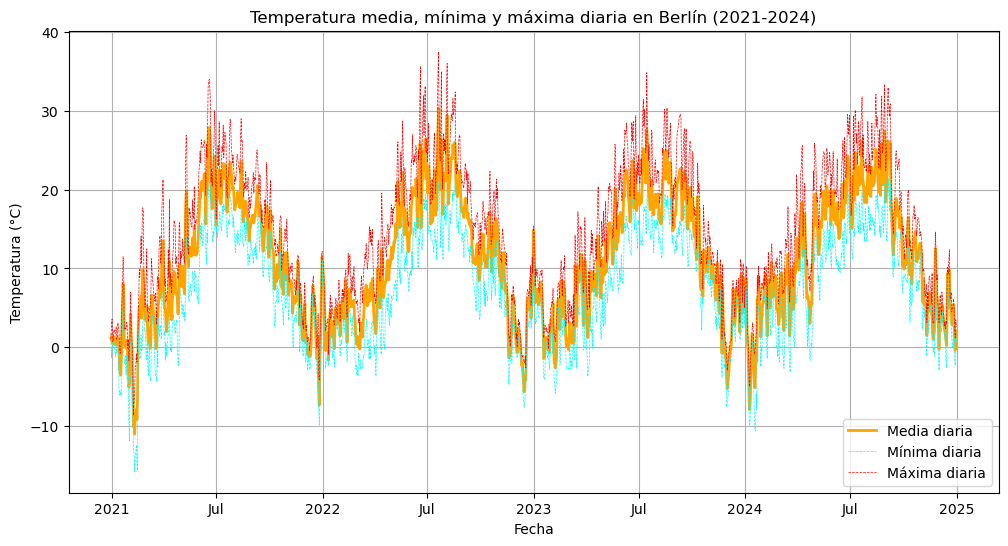

In [23]:
import xarray as xr
import matplotlib.pyplot as plt

# Cargar el archivo GRIB con decode_timedelta explícito
file_path = "/media/diego/Datos4/EBD/varios/VH/gribs/temperatura_2m_alemania_combinado.nc"
ds = xr.open_dataset(file_path, engine='netcdf4', decode_timedelta=False)

# Convertir la temperatura de Kelvin a Celsius
temperatura_celsius = ds['t2m'] - 273.15

# Seleccionar una coordenada específica (por ejemplo, Berlín: latitud ~52.52, longitud ~13.41)
latitud = 52.52
longitud = 13.41

# Extraer los datos para la coordenada específica
temperatura_punto = temperatura_celsius.sel(
    latitude=latitud, longitude=longitud, method='nearest'
)

# Calcular la media, mínima y máxima diaria
temperatura_media_diaria = temperatura_punto.mean(dim='step')
temperatura_minima_diaria = temperatura_punto.min(dim='step')
temperatura_maxima_diaria = temperatura_punto.max(dim='step')

# Graficar las series temporales
plt.figure(figsize=(12, 6))

# Graficar la media diaria (rojo para calor)
temperatura_media_diaria.plot(label='Media diaria', color='orange', linewidth=2)

# Graficar la mínima diaria (azul para frío)
temperatura_minima_diaria.plot(label='Mínima diaria', color='cyan', linestyle='--', linewidth=0.5)

# Graficar la máxima diaria (naranja para calor extremo)
temperatura_maxima_diaria.plot(label='Máxima diaria', color='red', linestyle='--', linewidth=0.5)

# Añadir título y etiquetas
plt.title(f'Temperatura media, mínima y máxima diaria en Berlín (2021-2024)')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.legend()  # Mostrar leyenda
plt.grid(True)  # Añadir una cuadrícula

# Mostrar la gráfica
plt.show()

# Descarga de datos de estadísticos diarios en bucle

In [ ]:
import cdsapi
import time

# 📌 Definir dataset de ERA5-Land con datos diarios
dataset = "derived-era5-land-daily-statistics"

# 📌 Bounding Box de Alemania con buffer (+0.5° de tolerancia)
buffer = 0.5
bbox = [
    53.9644 + buffer,  # Norte
    6.6298 - buffer,   # Oeste
    48.0637 - buffer,  # Sur
    13.9656 + buffer   # Este
]

# 🔥 Inicializar cliente de Copernicus
client = cdsapi.Client()

# 📥 Descargar datos año por año desde un bucle, ya que no permite realizar la consulta para varios años a la vez
for year in range(1950, 2024):  # 🔥 Desde 1950 hasta 2024
    print(f"📤 Solicitando datos para el año {year}...")

    request = {
        "variable": ["2m_temperature"],  # Temperatura a 2m
        "year": str(year),  # 🔥 Un solo año en cada iteración
        "month": [f"{m:02d}" for m in range(1, 13)],  # Todos los meses
        "day": [f"{d:02d}" for d in range(1, 32)],  # Todos los días
        "daily_statistic": "daily_mean", #, ["daily_minimum", "daily_maximum"],  # 📌 Media, Mínima y Máxima diaria
        "time_zone": "utc+00:00",  # UTC
        "area": bbox,  # 📌 Aplicar filtro espacial con buffer
        "format": "grib",  # Descargar en formato GRIB
    }

    # Descargar cada año en un archivo separado
    output_filename = f"temperatura_2m_diaria_{year}_alemania.grib"
    client.retrieve(dataset, request).download(output_filename)

    print(f"✅ Descarga completada: {output_filename}")

    # 🕒 Pausa de seguridad para evitar sobrecarga en la API
    time.sleep(5)  # Espera 5 segundos antes de la siguiente solicitud

## Convertir a geotiff (Medias mensuales)

In [10]:
import xarray as xr
import rioxarray

# Abrir el archivo netCDF
file_path = "/media/diego/Datos4/EBD/varios/VH/gribs/temperatura_2m_2022_alemania.grib"
ds = xr.open_dataset(file_path)

# Calcular el promedio mensual
monthly_mean = ds['t2m'].resample(time='1M').mean() # Cambiar por 1D para rasters diarios

# Iterar sobre cada mes
for i in range(len(monthly_mean['time'])):
    # Seleccionar el mes actual
    variable = monthly_mean.isel(time=i)

    # Asignar el CRS
    variable.rio.write_crs("EPSG:4326", inplace=True)

    # Guardar como GeoTIFF
    output_path = f"/media/diego/Datos4/EBD/varios/VH/gribs/temperatura_2m_2022_alemania_monthly_{i}.tif"
    variable.rio.to_raster(output_path)

    print(f"Archivo guardado en: {output_path}")

/home/diego/anaconda3/envs/Pv2/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
/home/diego/anaconda3/envs/Pv2/lib/python3.12/site-packages/xarray/groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


Archivo guardado en: /media/diego/Datos4/EBD/varios/VH/gribs/temperatura_2m_2022_alemania_monthly_0.tif
Archivo guardado en: /media/diego/Datos4/EBD/varios/VH/gribs/temperatura_2m_2022_alemania_monthly_1.tif
Archivo guardado en: /media/diego/Datos4/EBD/varios/VH/gribs/temperatura_2m_2022_alemania_monthly_2.tif
Archivo guardado en: /media/diego/Datos4/EBD/varios/VH/gribs/temperatura_2m_2022_alemania_monthly_3.tif
Archivo guardado en: /media/diego/Datos4/EBD/varios/VH/gribs/temperatura_2m_2022_alemania_monthly_4.tif
Archivo guardado en: /media/diego/Datos4/EBD/varios/VH/gribs/temperatura_2m_2022_alemania_monthly_5.tif
Archivo guardado en: /media/diego/Datos4/EBD/varios/VH/gribs/temperatura_2m_2022_alemania_monthly_6.tif
Archivo guardado en: /media/diego/Datos4/EBD/varios/VH/gribs/temperatura_2m_2022_alemania_monthly_7.tif
Archivo guardado en: /media/diego/Datos4/EBD/varios/VH/gribs/temperatura_2m_2022_alemania_monthly_8.tif
Archivo guardado en: /media/diego/Datos4/EBD/varios/VH/gribs/tem

## Creación de un tiff multibanda (Media diaria)

In [14]:
import xarray as xr
import numpy as np
import rasterio
from rasterio.transform import from_origin

# Abrir el archivo netCDF
file_path = "/media/diego/Datos4/EBD/varios/VH/gribs/temperatura_2m_2022_alemania.grib"
ds = xr.open_dataset(file_path)

# Calcular el promedio diario y eliminar la dimensión 'step'
daily_mean = ds['t2m'].resample(time='1D').mean(dim='step')  # Promediar sobre 'step'

# Verificar las dimensiones
print(daily_mean.dims)  # Debería ser ('time', 'latitude', 'longitude')
print(daily_mean.shape)  # Debería ser (367, 81, 101) para un año bisiesto

# Obtener las coordenadas y el CRS
lat = daily_mean['latitude'].values
lon = daily_mean['longitude'].values
crs = "EPSG:4326"  # Definir el CRS (por ejemplo, WGS84)

# Calcular la transformación affine
transform = from_origin(lon.min(), lat.max(), abs(lon[1] - lon[0]), abs(lat[1] - lat[0]))

# Crear un archivo GeoTIFF multibanda
output_path = "/media/diego/Datos4/EBD/varios/VH/gribs/temperatura_2m_2022_alemania_daily_multiband.tif"
with rasterio.open(
    output_path,
    'w',
    driver='GTiff',
    height=daily_mean.shape[1],  # Número de filas (latitud)
    width=daily_mean.shape[2],   # Número de columnas (longitud)
    count=len(daily_mean['time']),  # Número de bandas (días)
    dtype=daily_mean.dtype,
    crs=crs,
    transform=transform,
) as dst:
    # Escribir cada banda (día)
    for i in range(len(daily_mean['time'])):
        dst.write(daily_mean.isel(time=i).values, i + 1)  # Las bandas comienzan en 1

print(f"Archivo multibanda guardado en: {output_path}")

/home/diego/anaconda3/envs/Pv2/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


('time', 'latitude', 'longitude')
(367, 81, 101)
Archivo multibanda guardado en: /media/diego/Datos4/EBD/varios/VH/gribs/temperatura_2m_2022_alemania_daily_multiband.tif


# Análisis del csv de GEE

In [24]:
import pandas as pd

# 📂 Cargar el CSV
csv = '/media/diego/Datos4/EBD/varios/VH/City_Temperature_Stats_1950_2024_HourlyToDaily2.csv'
df = pd.read_csv(csv)

# 🔍 Seleccionar solo las columnas útiles
df = df[["city", "date", "mean", "min", "max", "stdDev"]]

# 📌 Convertir la columna 'date' a formato datetime
df["date"] = pd.to_datetime(df["date"])
print("Primeros datos disponibles en el CSV:", df["date"].min())

# 📌 Ordenar los datos por ciudad y fecha
df = df.sort_values(by=["city", "date"])

# 🔍 Verificar el resultado
print(df.head())

Primeros datos disponibles en el CSV: 1950-01-01 00:00:00
      city       date      mean       min       max    stdDev
6   Berlin 1950-01-01 -3.110376 -3.296012 -2.760346  0.144546
21  Berlin 1950-01-02  0.466023  0.204191  0.678393  0.131959
36  Berlin 1950-01-03  2.268994  2.060213  2.502433  0.113483
51  Berlin 1950-01-04 -0.545077 -0.787023 -0.365392  0.109647
66  Berlin 1950-01-05 -2.683513 -3.123306 -2.279963  0.214180


In [26]:
# Seleccionamos Berlín y nos aseguramos de que el index sea datetime
df['date'] = pd.to_datetime(df['date'])
# Filtrar para todo enero de 1952
result = df[(df['city'] == 'Berlin') & 
            (df['date'].dt.year == 1952) & 
            (df['date'].dt.month == 1)]

result.head()

,city,date,mean,min,max,stdDev
10956,Berlin,1952-01-01,0.956233,0.670424,1.495945,0.229297
10971,Berlin,1952-01-02,3.925287,3.639211,4.095754,0.130634
10986,Berlin,1952-01-03,3.380952,2.937697,3.880731,0.266736
11001,Berlin,1952-01-04,0.925969,0.829216,1.080599,0.054591
11016,Berlin,1952-01-05,1.103197,0.856383,1.247170,0.110826


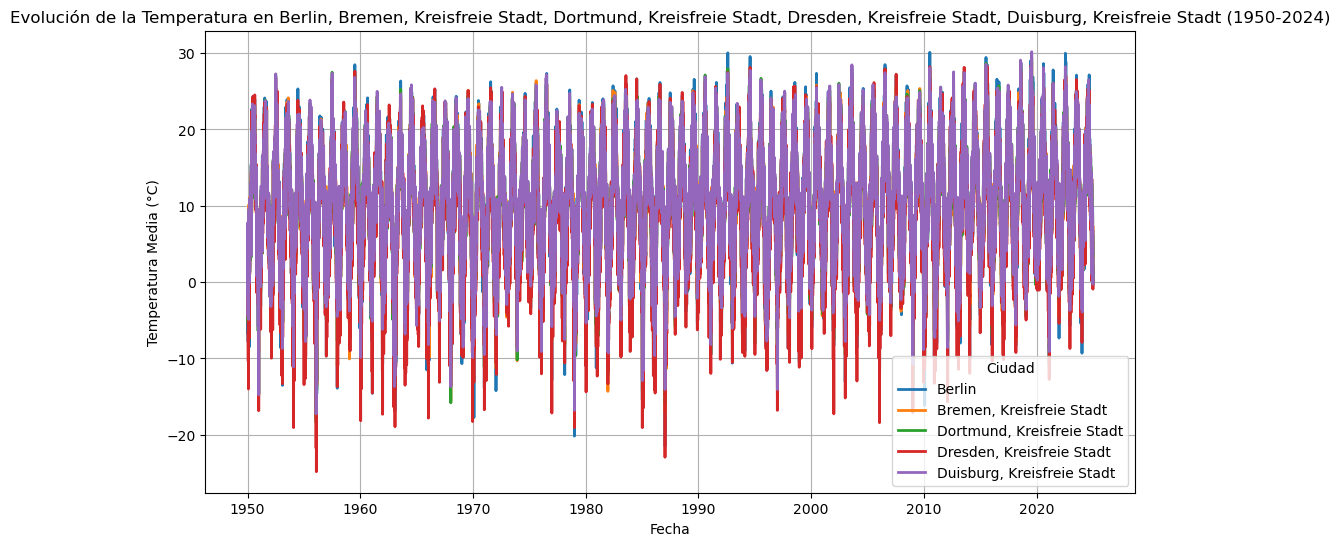

In [29]:
# 📍 Seleccionar dinámicamente las primeras 5 ciudades del dataset
ciudades_seleccionadas = df["city"].unique()[:5]  # Cambia [:5] por el número que quieras

# 📊 Graficar la evolución de temperatura en estas ciudades
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=df[df["city"].isin(ciudades_seleccionadas)], x="date", y="mean", hue="city", linewidth=2)

# 🔧 Configuración del gráfico
plt.xlabel("Fecha")
plt.ylabel("Temperatura Media (°C)")
plt.title(f"Evolución de la Temperatura en {', '.join(ciudades_seleccionadas)} (1950-2024)")
plt.legend(title="Ciudad")
plt.grid(True)

# 📌 Mostrar la gráfica
plt.show()

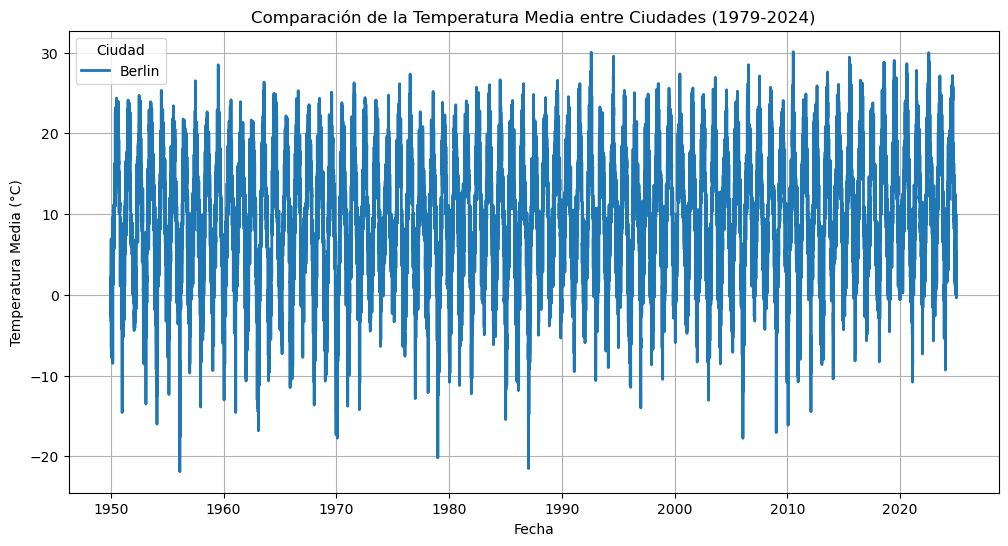

In [36]:
import seaborn as sns

# 📍 Seleccionar algunas ciudades para comparar
ciudades_seleccionadas = ["Berlin"]  # Puedes elegir más ciudades

# 📈 Filtrar el DataFrame con las ciudades seleccionadas
df_seleccionadas = df[df["city"].isin(ciudades_seleccionadas)]

# 📊 Graficar la evolución de temperatura en varias ciudades
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_seleccionadas, x="date", y="mean", hue="city", linewidth=2)

# 🔧 Configuración del gráfico
plt.xlabel("Fecha")
plt.ylabel("Temperatura Media (°C)")
plt.title("Comparación de la Temperatura Media entre Ciudades (1979-2024)")
plt.legend(title="Ciudad")
plt.grid(True)

# 📌 Mostrar la gráfica
plt.show()

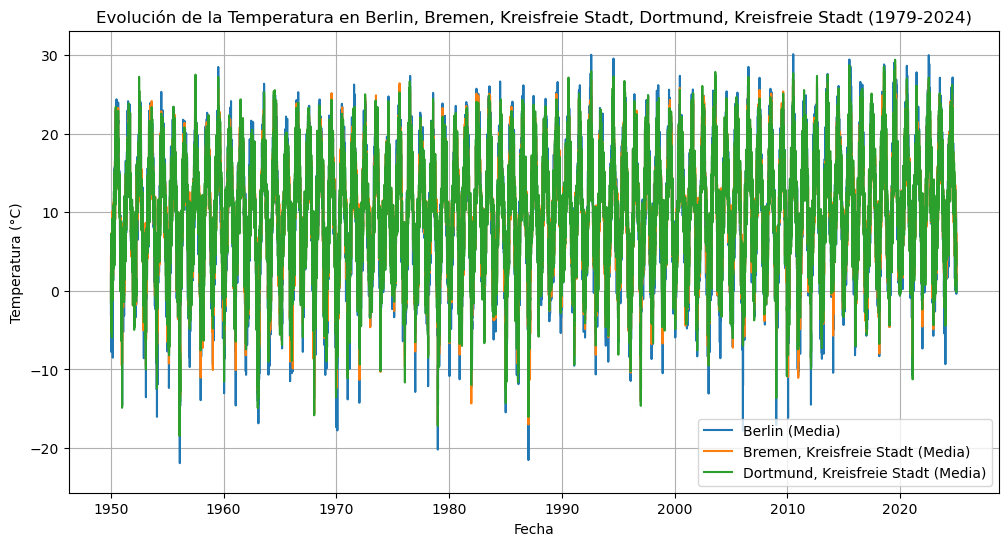

In [37]:
# 📌 Convertir la fecha a datetime
df["date"] = pd.to_datetime(df["date"])

# 📍 Seleccionar ciudades (puedes cambiar esto)
ciudades_seleccionadas = df["city"].unique()[:3]  # Las primeras 5 ciudades

# 📊 Graficar la evolución de temperatura con sombra de min/max
plt.figure(figsize=(12, 6))

for ciudad in ciudades_seleccionadas:
    df_ciudad = df[df["city"] == ciudad]
    plt.plot(df_ciudad["date"], df_ciudad["mean"], label=f"{ciudad} (Media)")
    plt.fill_between(df_ciudad["date"], df_ciudad["min"], df_ciudad["max"], alpha=0.2)

# 🔧 Configuración del gráfico
plt.xlabel("Fecha")
plt.ylabel("Temperatura (°C)")
plt.title(f"Evolución de la Temperatura en {', '.join(ciudades_seleccionadas)} (1979-2024)")
plt.legend()
plt.grid(True)

# 📌 Mostrar la gráfica
plt.show()

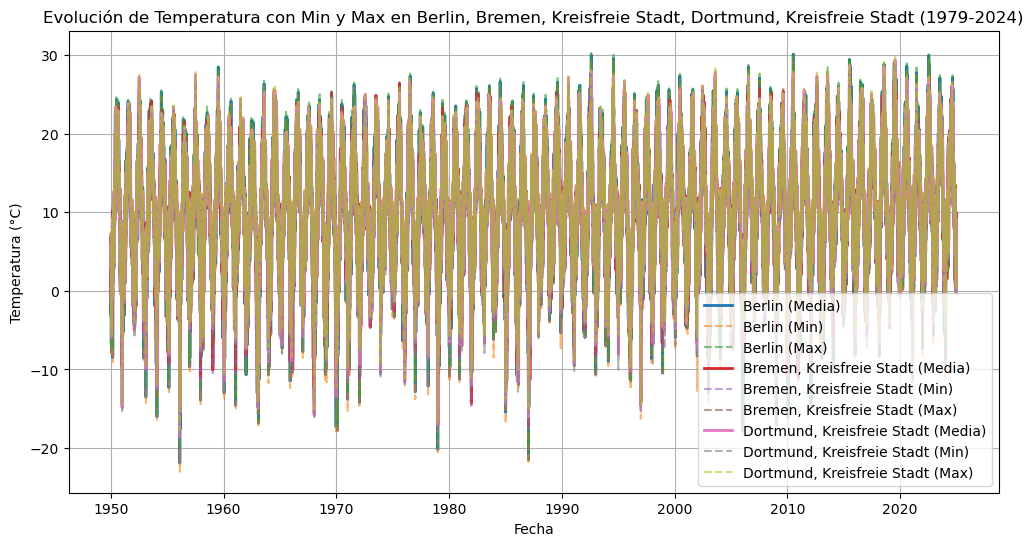

In [38]:
plt.figure(figsize=(12, 6))

for ciudad in ciudades_seleccionadas:
    df_ciudad = df[df["city"] == ciudad]
    plt.plot(df_ciudad["date"], df_ciudad["mean"], label=f"{ciudad} (Media)", linestyle="-", linewidth=2)
    plt.plot(df_ciudad["date"], df_ciudad["min"], label=f"{ciudad} (Min)", linestyle="dashed", alpha=0.6)
    plt.plot(df_ciudad["date"], df_ciudad["max"], label=f"{ciudad} (Max)", linestyle="dashed", alpha=0.6)

# 🔧 Configuración
plt.xlabel("Fecha")
plt.ylabel("Temperatura (°C)")
plt.title(f"Evolución de Temperatura con Min y Max en {', '.join(ciudades_seleccionadas)} (1979-2024)")
plt.legend()
plt.grid(True)

# 📌 Mostrar gráfico
plt.show()

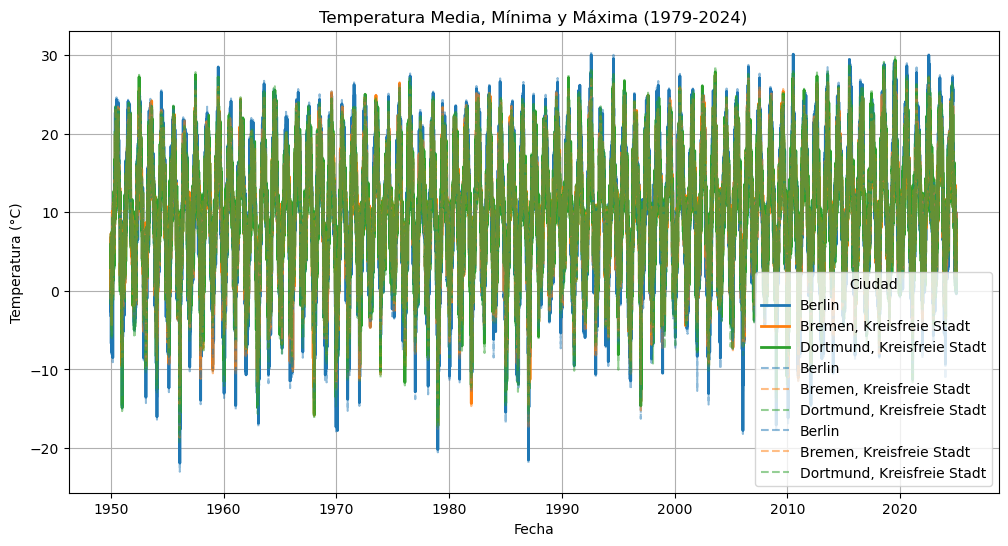

In [39]:
plt.figure(figsize=(12, 6))

# 📊 Graficar con seaborn
sns.lineplot(data=df[df["city"].isin(ciudades_seleccionadas)], x="date", y="mean", hue="city", linewidth=2)
sns.lineplot(data=df[df["city"].isin(ciudades_seleccionadas)], x="date", y="min", hue="city", linestyle="dashed", alpha=0.5)
sns.lineplot(data=df[df["city"].isin(ciudades_seleccionadas)], x="date", y="max", hue="city", linestyle="dashed", alpha=0.5)

# 🔧 Configuración
plt.xlabel("Fecha")
plt.ylabel("Temperatura (°C)")
plt.title("Temperatura Media, Mínima y Máxima (1979-2024)")
plt.legend(title="Ciudad")
plt.grid(True)

# 📌 Mostrar gráfico
plt.show()

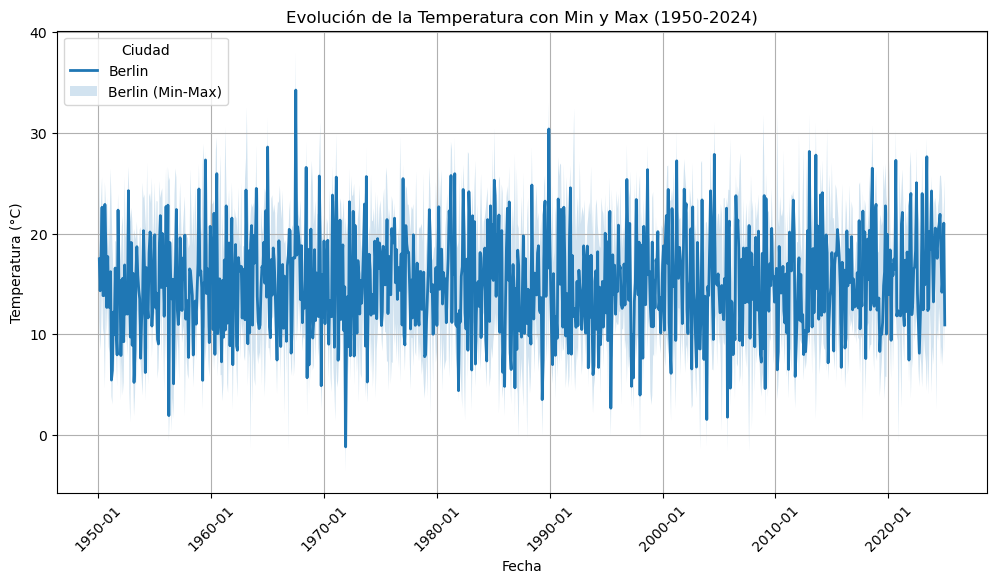

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.dates as mdates

# 🔹 Generar datos de prueba
np.random.seed(42)
dates = pd.date_range(start="1950-01-01", end="2024-12-31", freq="ME")
num_points = len(dates)

data = {
    "date": np.tile(dates, 1),
    "city": ["Berlin"] * num_points,
    "mean": np.random.normal(loc=15, scale=5, size=num_points),
    "min": np.random.normal(loc=10, scale=4, size=num_points),
    "max": np.random.normal(loc=20, scale=4, size=num_points)
}

# Asegurar que min <= mean <= max
df = pd.DataFrame(data)
df["min"] = np.minimum(df["mean"] - np.abs(np.random.normal(3, 1, num_points)), df["min"])
df["max"] = np.maximum(df["mean"] + np.abs(np.random.normal(3, 1, num_points)), df["max"])

# 📍 Seleccionar ciudades y período
ciudades_seleccionadas = ["Berlin"]
df["date"] = pd.to_datetime(df["date"])

df_filtrado = df[(df["date"] >= "1950-01-01") & (df["date"] <= "2024-12-31")]
df_filtrado = df_filtrado[df_filtrado["city"].isin(ciudades_seleccionadas)]

# ✅ Convertir fechas a valores numéricos para `fill_between`
df_filtrado["date_num"] = mdates.date2num(df_filtrado["date"])

# 📈 Graficar con Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtrado, x="date", y="mean", hue="city", linewidth=2)

# 📉 Agregar el sombreado min-máx con `matplotlib`
for ciudad in ciudades_seleccionadas:
    df_ciudad = df_filtrado[df_filtrado["city"] == ciudad]
    
    if not df_ciudad.empty:
        plt.fill_between(df_ciudad["date_num"], df_ciudad["min"], df_ciudad["max"], alpha=0.2, label=f"{ciudad} (Min-Max)")

# 🔧 Configuración del gráfico
plt.xlabel("Fecha")
plt.ylabel("Temperatura (°C)")
plt.title("Evolución de la Temperatura con Min y Max (1950-2024)")
plt.legend(title="Ciudad", loc="upper left")
plt.grid(True)

# ✅ Mejorar formato del eje X con fechas
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.xticks(rotation=45)

# 📌 Mostrar gráfico
plt.show()

In [48]:
df_julio = df[df["date"].dt.month == 7]
print(df_julio.head())

         date    city       mean        min        max
6  1950-07-31  Berlin  22.896064   4.560575  25.116211
18 1951-07-31  Berlin  10.459880   8.052236  19.155479
30 1952-07-31  Berlin  11.991467   7.760592  22.832858
42 1953-07-31  Berlin  14.421759  11.378244  17.805100
54 1954-07-31  Berlin  20.154998   9.671395  24.002329


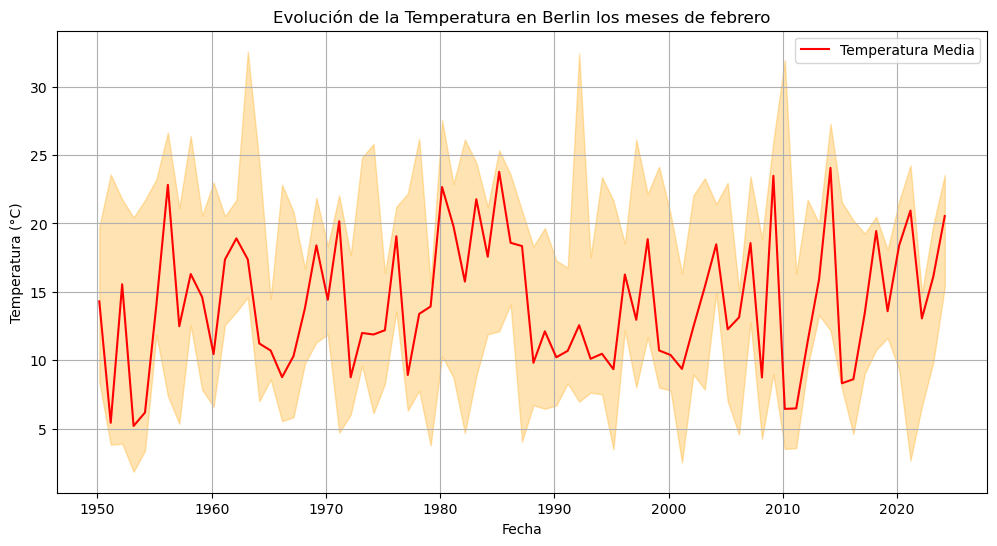

In [49]:
# 📌 Convertir la columna 'date' a datetime
df["date"] = pd.to_datetime(df["date"])

# 📍 Seleccionar una ciudad
ciudad = "Berlin"

# 📊 Filtrar solo los datos de julio
df_febrero = df[(df["date"].dt.month == 2) & (df["city"] == ciudad)]

# 📈 Graficar
plt.figure(figsize=(12, 6))
plt.plot(df_febrero["date"], df_febrero["mean"], label="Temperatura Media", color="red")
plt.fill_between(df_febrero["date"], df_febrero["min"], df_febrero["max"], color="orange", alpha=0.3)

# 🔧 Configuración del gráfico
plt.xlabel("Fecha")
plt.ylabel("Temperatura (°C)")
plt.title(f"Evolución de la Temperatura en {ciudad} los meses de febrero")
plt.legend()
plt.grid(True)

# 📌 Mostrar la gráfica
plt.show()